# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [1]:
# can comment out after executing
!unzip processed_celeba_small.zip

Archive:  processed_celeba_small.zip
replace processed_celeba_small/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""                     
import pickle as pkl
import matplotlib.pyplot as plt  
import numpy as np
# !pip install problem_unittests
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [3]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [4]:
from torch.utils.data import Dataset, DataLoader

def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small'):

    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
        
    :return: DataLoader with batched data
    """
    # TODO: Implement function and return a dataloader
    # resize and normalize the images
    transform = transforms.Compose([transforms.Resize(image_size), # resize to 32x32
                                    transforms.ToTensor()])
    
    # define datasets using ImageFolder
    train_dataset = datasets.ImageFolder(data_dir, transform)

    # create and return DataLoaders
    data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    return data_loader

## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [5]:
# Define function hyperparameters
batch_size = 32
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)

Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

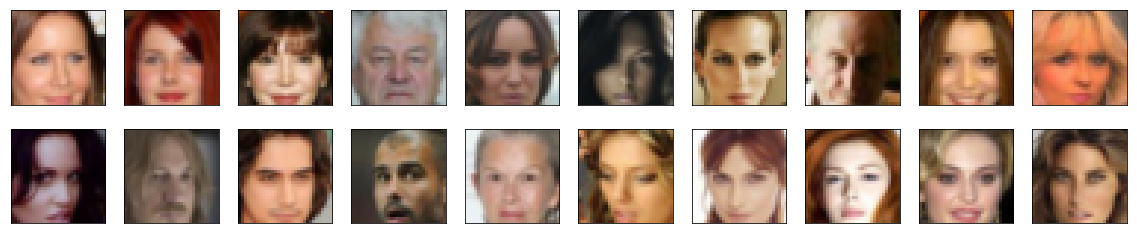

In [6]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [7]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    min, max = feature_range
    x = x * (max - min) + min
    
    return x

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9922)
Max:  tensor(0.9843)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """
    Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, 
                    kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
  
    layers.append(conv_layer)

    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))

    return nn.Sequential(*layers)  

In [11]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim
        
        # 32x32 input
        self.conv1 = conv(3, conv_dim, 4, batch_norm=False) # first layer, no batch_norm
        # 16x16 out
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        # 8x8 out
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4)
        # 4x4 out
        
        # final, fully-connected layer
        self.fc = nn.Linear(conv_dim*4*4*4, 1)

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
         # all hidden layers + leaky relu activation
        out = F.leaky_relu(self.conv1(x), 0.2)
        out = F.leaky_relu(self.conv2(out), 0.2)
        out = F.leaky_relu(self.conv3(out), 0.2)
        
        # flatten
        out = out.view(-1, self.conv_dim*4*4*4)
        
        # final output layer
        out = self.fc(out)        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [12]:
# helper deconv function
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    # create a sequence of transpose + optional batch norm layers
    layers = []
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                              kernel_size, stride, padding, bias=False)
    # append transpose convolutional layer
    layers.append(transpose_conv_layer)
    
    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
        
    return nn.Sequential(*layers)

In [13]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim
        
        # first, fully-connected layer
        self.fc = nn.Linear(z_size, conv_dim*4*4*4)

        # transpose conv layers
        self.t_conv1 = deconv(conv_dim*4, conv_dim*2, 4)
        self.t_conv2 = deconv(conv_dim*2, conv_dim, 4)
        self.t_conv3 = deconv(conv_dim, 3, 4, batch_norm=False)

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        # fully-connected + reshape 
        out = self.fc(x)
        out = out.view(-1, self.conv_dim*4, 4, 4) # (batch_size, depth, 4, 4)
        
        # hidden transpose conv layers + relu
        out = F.relu(self.t_conv1(out))
        out = F.relu(self.t_conv2(out))
        
        # last layer + tanh activation
        out = self.t_conv3(out)
        out = F.tanh(out)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [14]:
from torch.nn import init

def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
    init_type='normal'
    init_gain=0.02

    if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1):
            if init_type == 'normal':
                init.normal_(m.weight.data, 0.0, init_gain)
            elif init_type == 'xavier':
                init.xavier_normal_(m.weight.data, gain=init_gain)
            elif init_type == 'kaiming':
                init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
            elif init_type == 'orthogonal':
                init.orthogonal_(m.weight.data, gain=init_gain)
            else:
                raise NotImplementedError('initialization method [%s] is not implemented' % init_type)
            if hasattr(m, 'bias') and m.bias is not None:
                init.constant_(m.bias.data, 0.0)
    elif classname.find('BatchNorm2d') != -1:  # BatchNorm Layer's weight is not a matrix; only normal distribution applies.
        init.normal_(m.weight.data, 1.0, init_gain)
        init.constant_(m.bias.data, 0.0)

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G

#### Exercise: Define model hyperparameters

In [16]:
# Define model hyperparams
d_conv_dim = 32
g_conv_dim = 32
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Linear(in_features=2048, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=100, out_features=2048, bias=True)
  (t_conv1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (t_conv2): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [18]:
def real_loss(D_out, smooth=True):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
        
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    # binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [19]:
import torch.optim as optim

# Create optimizers for the discriminator D and generator G
# params
lr = 0.001
beta1=0.1
beta2=0.999 # default value

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [20]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            # 1. Train the discriminator on real and fake images
            d_optimizer.zero_grad()

            # 1-1. Train with real images

            # Compute the discriminator losses on real images 
            if train_on_gpu:
                real_images = real_images.cuda()
        
            D_real = D(real_images)
            d_real_loss = real_loss(D_real)
        
            # 1-2. Train with fake images
        
            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            # move x to GPU, if available
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
        
            # Compute the discriminator losses on fake images            
            D_fake = D(fake_images)
            d_fake_loss = fake_loss(D_fake)
        
            # add up loss and perform backprop
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()

            # 2. Train the generator with an adversarial loss
            g_optimizer.zero_grad()
        
            # 2-1. Train with fake images and flipped labels
        
            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)
        
            # Compute the discriminator losses on fake images 
            # using flipped labels!
            D_fake = D(fake_images)
            g_loss = real_loss(D_fake) # use real loss to flip labels
        
            # perform backprop
            g_loss.backward()
            g_optimizer.step()
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [21]:
# set number of epochs 
n_epochs = 50


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/   50] | d_loss: 1.5577 | g_loss: 1.3858
Epoch [    1/   50] | d_loss: 1.6678 | g_loss: 0.7486
Epoch [    1/   50] | d_loss: 1.1102 | g_loss: 0.8593
Epoch [    1/   50] | d_loss: 1.2391 | g_loss: 0.7313
Epoch [    1/   50] | d_loss: 1.4828 | g_loss: 2.0383
Epoch [    1/   50] | d_loss: 1.2715 | g_loss: 1.0454
Epoch [    1/   50] | d_loss: 1.2473 | g_loss: 0.9971
Epoch [    1/   50] | d_loss: 1.4145 | g_loss: 1.0519
Epoch [    1/   50] | d_loss: 1.3825 | g_loss: 0.8533
Epoch [    1/   50] | d_loss: 1.2801 | g_loss: 0.9468
Epoch [    1/   50] | d_loss: 1.3772 | g_loss: 1.2293
Epoch [    1/   50] | d_loss: 1.5872 | g_loss: 0.6034
Epoch [    1/   50] | d_loss: 1.3819 | g_loss: 0.9617
Epoch [    1/   50] | d_loss: 1.3195 | g_loss: 1.2168
Epoch [    1/   50] | d_loss: 1.4738 | g_loss: 0.6791
Epoch [    1/   50] | d_loss: 1.4161 | g_loss: 0.8170
Epoch [    1/   50] | d_loss: 1.3345 | g_loss: 0.9887
Epoch [    1/   50] | d_loss: 1.2902 | g_loss: 1.1179
Epoch [    1/   50] | d_loss

Epoch [    3/   50] | d_loss: 1.1169 | g_loss: 1.3125
Epoch [    3/   50] | d_loss: 1.0659 | g_loss: 1.7201
Epoch [    3/   50] | d_loss: 1.0988 | g_loss: 1.1377
Epoch [    3/   50] | d_loss: 1.2444 | g_loss: 1.3351
Epoch [    3/   50] | d_loss: 0.8417 | g_loss: 1.5039
Epoch [    3/   50] | d_loss: 1.3014 | g_loss: 0.7875
Epoch [    3/   50] | d_loss: 1.0472 | g_loss: 1.1564
Epoch [    3/   50] | d_loss: 0.9926 | g_loss: 1.1604
Epoch [    3/   50] | d_loss: 1.0630 | g_loss: 1.3188
Epoch [    3/   50] | d_loss: 1.0931 | g_loss: 1.2223
Epoch [    3/   50] | d_loss: 1.1750 | g_loss: 1.7567
Epoch [    3/   50] | d_loss: 1.0628 | g_loss: 1.4652
Epoch [    3/   50] | d_loss: 1.1252 | g_loss: 0.8415
Epoch [    3/   50] | d_loss: 1.1871 | g_loss: 1.2809
Epoch [    3/   50] | d_loss: 1.0593 | g_loss: 1.3167
Epoch [    3/   50] | d_loss: 1.0457 | g_loss: 1.3392
Epoch [    3/   50] | d_loss: 1.0113 | g_loss: 1.4587
Epoch [    3/   50] | d_loss: 1.0010 | g_loss: 1.1696
Epoch [    3/   50] | d_loss

Epoch [    6/   50] | d_loss: 1.0389 | g_loss: 1.4845
Epoch [    6/   50] | d_loss: 0.9100 | g_loss: 1.1601
Epoch [    6/   50] | d_loss: 0.7710 | g_loss: 1.8509
Epoch [    6/   50] | d_loss: 1.1744 | g_loss: 0.7749
Epoch [    6/   50] | d_loss: 1.0448 | g_loss: 0.7262
Epoch [    6/   50] | d_loss: 0.8494 | g_loss: 2.2671
Epoch [    6/   50] | d_loss: 0.8483 | g_loss: 1.5861
Epoch [    6/   50] | d_loss: 0.8893 | g_loss: 1.2416
Epoch [    6/   50] | d_loss: 0.9418 | g_loss: 1.8926
Epoch [    6/   50] | d_loss: 1.0388 | g_loss: 1.1047
Epoch [    6/   50] | d_loss: 0.7986 | g_loss: 1.8258
Epoch [    6/   50] | d_loss: 0.7702 | g_loss: 1.4398
Epoch [    6/   50] | d_loss: 1.0886 | g_loss: 1.0474
Epoch [    6/   50] | d_loss: 0.8440 | g_loss: 1.7922
Epoch [    6/   50] | d_loss: 0.7291 | g_loss: 2.5890
Epoch [    6/   50] | d_loss: 0.7776 | g_loss: 1.4547
Epoch [    6/   50] | d_loss: 1.0156 | g_loss: 1.9087
Epoch [    6/   50] | d_loss: 0.7260 | g_loss: 2.3862
Epoch [    6/   50] | d_loss

Epoch [    9/   50] | d_loss: 0.9207 | g_loss: 0.9096
Epoch [    9/   50] | d_loss: 0.7065 | g_loss: 1.4059
Epoch [    9/   50] | d_loss: 0.7766 | g_loss: 2.1628
Epoch [    9/   50] | d_loss: 0.6265 | g_loss: 2.5515
Epoch [    9/   50] | d_loss: 1.5607 | g_loss: 0.7832
Epoch [    9/   50] | d_loss: 1.1228 | g_loss: 0.7952
Epoch [    9/   50] | d_loss: 0.5578 | g_loss: 1.9724
Epoch [    9/   50] | d_loss: 0.8665 | g_loss: 2.3659
Epoch [    9/   50] | d_loss: 0.9760 | g_loss: 3.4859
Epoch [    9/   50] | d_loss: 0.8523 | g_loss: 1.9443
Epoch [    9/   50] | d_loss: 0.6988 | g_loss: 1.7842
Epoch [    9/   50] | d_loss: 1.2026 | g_loss: 3.0978
Epoch [    9/   50] | d_loss: 0.6015 | g_loss: 1.9952
Epoch [    9/   50] | d_loss: 0.7308 | g_loss: 2.3253
Epoch [    9/   50] | d_loss: 0.8641 | g_loss: 3.6702
Epoch [    9/   50] | d_loss: 0.7888 | g_loss: 2.6287
Epoch [    9/   50] | d_loss: 0.8047 | g_loss: 1.3129
Epoch [    9/   50] | d_loss: 0.6933 | g_loss: 2.9937
Epoch [    9/   50] | d_loss

Epoch [   11/   50] | d_loss: 0.7482 | g_loss: 1.5780
Epoch [   11/   50] | d_loss: 0.6642 | g_loss: 1.6106
Epoch [   11/   50] | d_loss: 0.7452 | g_loss: 2.5804
Epoch [   11/   50] | d_loss: 0.6305 | g_loss: 2.4230
Epoch [   11/   50] | d_loss: 0.8598 | g_loss: 1.9469
Epoch [   11/   50] | d_loss: 0.8901 | g_loss: 1.9710
Epoch [   11/   50] | d_loss: 0.6408 | g_loss: 2.1737
Epoch [   11/   50] | d_loss: 0.6704 | g_loss: 2.5070
Epoch [   11/   50] | d_loss: 0.6535 | g_loss: 2.2077
Epoch [   11/   50] | d_loss: 0.7549 | g_loss: 2.5099
Epoch [   11/   50] | d_loss: 0.6365 | g_loss: 3.1852
Epoch [   11/   50] | d_loss: 0.6923 | g_loss: 1.6393
Epoch [   11/   50] | d_loss: 0.6699 | g_loss: 1.6534
Epoch [   11/   50] | d_loss: 0.5920 | g_loss: 2.1462
Epoch [   11/   50] | d_loss: 0.8907 | g_loss: 1.7570
Epoch [   11/   50] | d_loss: 0.6304 | g_loss: 2.2925
Epoch [   11/   50] | d_loss: 0.8342 | g_loss: 2.0466
Epoch [   11/   50] | d_loss: 0.4956 | g_loss: 2.6583
Epoch [   11/   50] | d_loss

Epoch [   14/   50] | d_loss: 0.8004 | g_loss: 2.3756
Epoch [   14/   50] | d_loss: 0.7012 | g_loss: 2.5002
Epoch [   14/   50] | d_loss: 0.5786 | g_loss: 1.5674
Epoch [   14/   50] | d_loss: 0.9790 | g_loss: 1.8374
Epoch [   14/   50] | d_loss: 0.5821 | g_loss: 2.3846
Epoch [   14/   50] | d_loss: 0.6096 | g_loss: 2.9483
Epoch [   14/   50] | d_loss: 0.6738 | g_loss: 4.0113
Epoch [   14/   50] | d_loss: 0.6097 | g_loss: 2.2346
Epoch [   14/   50] | d_loss: 0.6017 | g_loss: 2.1912
Epoch [   14/   50] | d_loss: 0.5053 | g_loss: 3.4536
Epoch [   14/   50] | d_loss: 0.5068 | g_loss: 2.6498
Epoch [   14/   50] | d_loss: 0.5290 | g_loss: 2.5068
Epoch [   14/   50] | d_loss: 0.8032 | g_loss: 1.6842
Epoch [   14/   50] | d_loss: 0.4961 | g_loss: 2.2502
Epoch [   14/   50] | d_loss: 0.9718 | g_loss: 1.9664
Epoch [   14/   50] | d_loss: 0.5726 | g_loss: 2.5877
Epoch [   14/   50] | d_loss: 0.7059 | g_loss: 2.3848
Epoch [   14/   50] | d_loss: 0.5084 | g_loss: 3.3380
Epoch [   14/   50] | d_loss

Epoch [   17/   50] | d_loss: 1.2864 | g_loss: 4.2067
Epoch [   17/   50] | d_loss: 0.7400 | g_loss: 1.7154
Epoch [   17/   50] | d_loss: 0.5910 | g_loss: 2.3287
Epoch [   17/   50] | d_loss: 0.6960 | g_loss: 2.5593
Epoch [   17/   50] | d_loss: 0.6430 | g_loss: 2.4191
Epoch [   17/   50] | d_loss: 0.5727 | g_loss: 2.3572
Epoch [   17/   50] | d_loss: 0.5880 | g_loss: 2.8100
Epoch [   17/   50] | d_loss: 0.6286 | g_loss: 2.8742
Epoch [   17/   50] | d_loss: 0.5844 | g_loss: 1.7224
Epoch [   17/   50] | d_loss: 0.5231 | g_loss: 3.2005
Epoch [   17/   50] | d_loss: 0.7070 | g_loss: 1.8292
Epoch [   17/   50] | d_loss: 0.6814 | g_loss: 2.4175
Epoch [   17/   50] | d_loss: 0.5336 | g_loss: 2.7825
Epoch [   17/   50] | d_loss: 0.6429 | g_loss: 1.9924
Epoch [   17/   50] | d_loss: 0.4647 | g_loss: 3.5031
Epoch [   17/   50] | d_loss: 0.5634 | g_loss: 3.1074
Epoch [   17/   50] | d_loss: 0.8091 | g_loss: 1.3766
Epoch [   17/   50] | d_loss: 0.6862 | g_loss: 2.7324
Epoch [   17/   50] | d_loss

Epoch [   19/   50] | d_loss: 0.8539 | g_loss: 2.3398
Epoch [   19/   50] | d_loss: 0.6012 | g_loss: 2.4940
Epoch [   19/   50] | d_loss: 0.6325 | g_loss: 2.8264
Epoch [   19/   50] | d_loss: 0.6292 | g_loss: 2.9846
Epoch [   19/   50] | d_loss: 0.5281 | g_loss: 2.6579
Epoch [   19/   50] | d_loss: 0.6412 | g_loss: 2.2628
Epoch [   19/   50] | d_loss: 0.5638 | g_loss: 2.6047
Epoch [   19/   50] | d_loss: 0.5547 | g_loss: 3.7080
Epoch [   19/   50] | d_loss: 0.7162 | g_loss: 2.7082
Epoch [   19/   50] | d_loss: 0.6935 | g_loss: 2.6439
Epoch [   19/   50] | d_loss: 0.6824 | g_loss: 2.4784
Epoch [   19/   50] | d_loss: 0.7546 | g_loss: 1.8482
Epoch [   19/   50] | d_loss: 0.5824 | g_loss: 3.2204
Epoch [   19/   50] | d_loss: 0.4300 | g_loss: 2.9314
Epoch [   19/   50] | d_loss: 1.0881 | g_loss: 5.0173
Epoch [   19/   50] | d_loss: 0.4383 | g_loss: 3.8009
Epoch [   19/   50] | d_loss: 0.6927 | g_loss: 3.9509
Epoch [   19/   50] | d_loss: 0.5429 | g_loss: 3.1991
Epoch [   19/   50] | d_loss

Epoch [   22/   50] | d_loss: 0.6198 | g_loss: 2.8559
Epoch [   22/   50] | d_loss: 0.7083 | g_loss: 3.2703
Epoch [   22/   50] | d_loss: 0.9823 | g_loss: 1.3068
Epoch [   22/   50] | d_loss: 1.0101 | g_loss: 0.7813
Epoch [   22/   50] | d_loss: 0.4747 | g_loss: 3.6812
Epoch [   22/   50] | d_loss: 0.7793 | g_loss: 2.9626
Epoch [   22/   50] | d_loss: 0.4705 | g_loss: 3.9616
Epoch [   22/   50] | d_loss: 0.4771 | g_loss: 3.0853
Epoch [   22/   50] | d_loss: 0.5081 | g_loss: 2.4772
Epoch [   22/   50] | d_loss: 1.0540 | g_loss: 3.9721
Epoch [   22/   50] | d_loss: 0.5370 | g_loss: 3.6635
Epoch [   22/   50] | d_loss: 0.6353 | g_loss: 3.0109
Epoch [   22/   50] | d_loss: 0.7520 | g_loss: 3.1703
Epoch [   22/   50] | d_loss: 0.5571 | g_loss: 2.8782
Epoch [   22/   50] | d_loss: 0.6340 | g_loss: 2.5016
Epoch [   22/   50] | d_loss: 0.5298 | g_loss: 2.6797
Epoch [   22/   50] | d_loss: 1.0196 | g_loss: 1.3933
Epoch [   22/   50] | d_loss: 0.4988 | g_loss: 3.0816
Epoch [   22/   50] | d_loss

Epoch [   25/   50] | d_loss: 0.6583 | g_loss: 2.6943
Epoch [   25/   50] | d_loss: 1.1234 | g_loss: 4.4394
Epoch [   25/   50] | d_loss: 0.4693 | g_loss: 2.6178
Epoch [   25/   50] | d_loss: 0.4329 | g_loss: 2.3663
Epoch [   25/   50] | d_loss: 0.5894 | g_loss: 2.4035
Epoch [   25/   50] | d_loss: 0.5782 | g_loss: 3.1338
Epoch [   25/   50] | d_loss: 0.5240 | g_loss: 3.5166
Epoch [   25/   50] | d_loss: 0.6731 | g_loss: 3.1570
Epoch [   25/   50] | d_loss: 0.6048 | g_loss: 2.7818
Epoch [   25/   50] | d_loss: 0.4845 | g_loss: 4.2499
Epoch [   25/   50] | d_loss: 0.5263 | g_loss: 2.6360
Epoch [   25/   50] | d_loss: 0.4357 | g_loss: 2.9462
Epoch [   25/   50] | d_loss: 0.5287 | g_loss: 2.5216
Epoch [   25/   50] | d_loss: 1.0025 | g_loss: 1.4551
Epoch [   25/   50] | d_loss: 0.6987 | g_loss: 2.0698
Epoch [   25/   50] | d_loss: 1.3317 | g_loss: 1.1933
Epoch [   25/   50] | d_loss: 0.6411 | g_loss: 1.7957
Epoch [   25/   50] | d_loss: 0.5605 | g_loss: 2.6656
Epoch [   25/   50] | d_loss

Epoch [   27/   50] | d_loss: 0.5337 | g_loss: 3.3635
Epoch [   27/   50] | d_loss: 0.4322 | g_loss: 3.6076
Epoch [   27/   50] | d_loss: 0.5718 | g_loss: 2.9739
Epoch [   27/   50] | d_loss: 0.5050 | g_loss: 2.4200
Epoch [   27/   50] | d_loss: 0.5034 | g_loss: 3.1658
Epoch [   27/   50] | d_loss: 0.9678 | g_loss: 0.9097
Epoch [   27/   50] | d_loss: 0.8531 | g_loss: 3.9694
Epoch [   27/   50] | d_loss: 0.8093 | g_loss: 3.9368
Epoch [   27/   50] | d_loss: 0.5864 | g_loss: 2.9003
Epoch [   27/   50] | d_loss: 0.5592 | g_loss: 2.6046
Epoch [   27/   50] | d_loss: 0.5680 | g_loss: 1.6127
Epoch [   27/   50] | d_loss: 0.5569 | g_loss: 3.8354
Epoch [   27/   50] | d_loss: 1.0588 | g_loss: 4.1823
Epoch [   27/   50] | d_loss: 0.5104 | g_loss: 2.7930
Epoch [   27/   50] | d_loss: 0.8003 | g_loss: 2.3051
Epoch [   27/   50] | d_loss: 0.4680 | g_loss: 3.9465
Epoch [   27/   50] | d_loss: 0.4583 | g_loss: 4.4301
Epoch [   27/   50] | d_loss: 0.5515 | g_loss: 2.6440
Epoch [   27/   50] | d_loss

Epoch [   30/   50] | d_loss: 0.5940 | g_loss: 2.6625
Epoch [   30/   50] | d_loss: 0.6007 | g_loss: 1.9904
Epoch [   30/   50] | d_loss: 0.5016 | g_loss: 3.7368
Epoch [   30/   50] | d_loss: 0.4638 | g_loss: 2.7453
Epoch [   30/   50] | d_loss: 0.9526 | g_loss: 4.6886
Epoch [   30/   50] | d_loss: 0.9805 | g_loss: 3.8437
Epoch [   30/   50] | d_loss: 0.7034 | g_loss: 1.9102
Epoch [   30/   50] | d_loss: 0.4838 | g_loss: 2.6894
Epoch [   30/   50] | d_loss: 0.4140 | g_loss: 2.6207
Epoch [   30/   50] | d_loss: 0.6656 | g_loss: 3.2861
Epoch [   30/   50] | d_loss: 0.6229 | g_loss: 2.6569
Epoch [   30/   50] | d_loss: 0.4799 | g_loss: 5.0862
Epoch [   30/   50] | d_loss: 0.4889 | g_loss: 2.8743
Epoch [   30/   50] | d_loss: 0.5625 | g_loss: 2.9371
Epoch [   30/   50] | d_loss: 0.4945 | g_loss: 2.7806
Epoch [   30/   50] | d_loss: 1.1915 | g_loss: 1.7661
Epoch [   30/   50] | d_loss: 0.7093 | g_loss: 3.7991
Epoch [   30/   50] | d_loss: 0.8067 | g_loss: 2.0775
Epoch [   30/   50] | d_loss

Epoch [   33/   50] | d_loss: 0.5910 | g_loss: 2.5854
Epoch [   33/   50] | d_loss: 0.4092 | g_loss: 3.6455
Epoch [   33/   50] | d_loss: 0.5811 | g_loss: 3.6228
Epoch [   33/   50] | d_loss: 0.5902 | g_loss: 2.5107
Epoch [   33/   50] | d_loss: 0.5298 | g_loss: 3.0436
Epoch [   33/   50] | d_loss: 0.6080 | g_loss: 2.5242
Epoch [   33/   50] | d_loss: 0.4371 | g_loss: 3.1086
Epoch [   33/   50] | d_loss: 0.5964 | g_loss: 3.6270
Epoch [   33/   50] | d_loss: 0.9749 | g_loss: 4.9319
Epoch [   33/   50] | d_loss: 0.7312 | g_loss: 3.7924
Epoch [   33/   50] | d_loss: 0.4223 | g_loss: 3.7796
Epoch [   33/   50] | d_loss: 0.5098 | g_loss: 3.5000
Epoch [   33/   50] | d_loss: 0.6500 | g_loss: 2.5916
Epoch [   33/   50] | d_loss: 0.6530 | g_loss: 3.7643
Epoch [   33/   50] | d_loss: 0.4945 | g_loss: 4.7626
Epoch [   33/   50] | d_loss: 0.6722 | g_loss: 2.1227
Epoch [   33/   50] | d_loss: 0.4950 | g_loss: 3.3130
Epoch [   33/   50] | d_loss: 0.4495 | g_loss: 3.4926
Epoch [   33/   50] | d_loss

Epoch [   35/   50] | d_loss: 0.5225 | g_loss: 2.5341
Epoch [   35/   50] | d_loss: 0.5230 | g_loss: 2.7774
Epoch [   35/   50] | d_loss: 0.5408 | g_loss: 2.7130
Epoch [   35/   50] | d_loss: 0.3904 | g_loss: 3.5571
Epoch [   35/   50] | d_loss: 0.4465 | g_loss: 2.3712
Epoch [   35/   50] | d_loss: 0.5431 | g_loss: 3.4939
Epoch [   35/   50] | d_loss: 0.4337 | g_loss: 2.7393
Epoch [   35/   50] | d_loss: 0.4587 | g_loss: 2.6941
Epoch [   35/   50] | d_loss: 0.4028 | g_loss: 3.4758
Epoch [   35/   50] | d_loss: 0.5328 | g_loss: 1.9840
Epoch [   35/   50] | d_loss: 0.5369 | g_loss: 3.2899
Epoch [   35/   50] | d_loss: 0.5323 | g_loss: 3.0288
Epoch [   35/   50] | d_loss: 0.5185 | g_loss: 2.7728
Epoch [   35/   50] | d_loss: 0.4857 | g_loss: 2.4090
Epoch [   35/   50] | d_loss: 0.4748 | g_loss: 3.5588
Epoch [   35/   50] | d_loss: 0.4482 | g_loss: 3.6024
Epoch [   35/   50] | d_loss: 0.5645 | g_loss: 3.2434
Epoch [   35/   50] | d_loss: 0.5070 | g_loss: 3.9859
Epoch [   35/   50] | d_loss

Epoch [   38/   50] | d_loss: 0.4728 | g_loss: 3.0070
Epoch [   38/   50] | d_loss: 0.7788 | g_loss: 2.5723
Epoch [   38/   50] | d_loss: 0.6617 | g_loss: 3.0168
Epoch [   38/   50] | d_loss: 0.7643 | g_loss: 2.3324
Epoch [   38/   50] | d_loss: 0.8303 | g_loss: 2.5297
Epoch [   38/   50] | d_loss: 0.4738 | g_loss: 4.1312
Epoch [   38/   50] | d_loss: 0.5714 | g_loss: 4.2482
Epoch [   38/   50] | d_loss: 0.6964 | g_loss: 2.4894
Epoch [   38/   50] | d_loss: 0.5292 | g_loss: 2.9598
Epoch [   38/   50] | d_loss: 0.4477 | g_loss: 3.0631
Epoch [   38/   50] | d_loss: 0.4405 | g_loss: 3.9085
Epoch [   38/   50] | d_loss: 0.4150 | g_loss: 2.8934
Epoch [   38/   50] | d_loss: 0.5288 | g_loss: 3.4286
Epoch [   38/   50] | d_loss: 0.5223 | g_loss: 3.2098
Epoch [   38/   50] | d_loss: 0.9317 | g_loss: 1.9264
Epoch [   38/   50] | d_loss: 0.4532 | g_loss: 3.4489
Epoch [   38/   50] | d_loss: 0.7254 | g_loss: 1.7208
Epoch [   38/   50] | d_loss: 0.4397 | g_loss: 2.8034
Epoch [   38/   50] | d_loss

Epoch [   41/   50] | d_loss: 1.4608 | g_loss: 5.0700
Epoch [   41/   50] | d_loss: 0.5876 | g_loss: 3.9462
Epoch [   41/   50] | d_loss: 0.4839 | g_loss: 3.5095
Epoch [   41/   50] | d_loss: 0.5107 | g_loss: 3.5138
Epoch [   41/   50] | d_loss: 0.5568 | g_loss: 2.5283
Epoch [   41/   50] | d_loss: 0.7570 | g_loss: 4.1332
Epoch [   41/   50] | d_loss: 1.3148 | g_loss: 4.9712
Epoch [   41/   50] | d_loss: 0.4733 | g_loss: 2.8390
Epoch [   41/   50] | d_loss: 0.5476 | g_loss: 3.9005
Epoch [   41/   50] | d_loss: 0.9404 | g_loss: 3.9683
Epoch [   41/   50] | d_loss: 0.5612 | g_loss: 2.5809
Epoch [   41/   50] | d_loss: 0.3928 | g_loss: 3.2195
Epoch [   41/   50] | d_loss: 0.4730 | g_loss: 4.3931
Epoch [   41/   50] | d_loss: 0.4346 | g_loss: 3.8453
Epoch [   41/   50] | d_loss: 0.4972 | g_loss: 2.6293
Epoch [   41/   50] | d_loss: 0.5091 | g_loss: 3.4770
Epoch [   41/   50] | d_loss: 0.4792 | g_loss: 3.4361
Epoch [   41/   50] | d_loss: 0.6249 | g_loss: 5.2436
Epoch [   41/   50] | d_loss

Epoch [   43/   50] | d_loss: 0.7192 | g_loss: 2.1370
Epoch [   43/   50] | d_loss: 0.6877 | g_loss: 4.4448
Epoch [   43/   50] | d_loss: 0.4352 | g_loss: 3.4050
Epoch [   43/   50] | d_loss: 0.5831 | g_loss: 4.2676
Epoch [   43/   50] | d_loss: 0.5669 | g_loss: 2.8105
Epoch [   43/   50] | d_loss: 0.5142 | g_loss: 3.4406
Epoch [   43/   50] | d_loss: 0.5257 | g_loss: 3.0298
Epoch [   43/   50] | d_loss: 0.4314 | g_loss: 3.5834
Epoch [   43/   50] | d_loss: 0.4456 | g_loss: 3.7546
Epoch [   43/   50] | d_loss: 0.6228 | g_loss: 2.5246
Epoch [   43/   50] | d_loss: 0.6736 | g_loss: 3.6292
Epoch [   43/   50] | d_loss: 0.4413 | g_loss: 3.9306
Epoch [   43/   50] | d_loss: 0.5043 | g_loss: 3.2671
Epoch [   43/   50] | d_loss: 1.4170 | g_loss: 4.2329
Epoch [   43/   50] | d_loss: 0.4790 | g_loss: 4.4176
Epoch [   43/   50] | d_loss: 0.4791 | g_loss: 3.1036
Epoch [   43/   50] | d_loss: 0.5307 | g_loss: 3.1874
Epoch [   43/   50] | d_loss: 0.5904 | g_loss: 2.0660
Epoch [   43/   50] | d_loss

Epoch [   46/   50] | d_loss: 0.5380 | g_loss: 3.0891
Epoch [   46/   50] | d_loss: 1.2233 | g_loss: 4.8335
Epoch [   46/   50] | d_loss: 0.4611 | g_loss: 3.8300
Epoch [   46/   50] | d_loss: 0.4815 | g_loss: 3.4983
Epoch [   46/   50] | d_loss: 0.4631 | g_loss: 3.4574
Epoch [   46/   50] | d_loss: 0.4201 | g_loss: 2.8028
Epoch [   46/   50] | d_loss: 0.5108 | g_loss: 4.5088
Epoch [   46/   50] | d_loss: 0.4541 | g_loss: 4.0764
Epoch [   46/   50] | d_loss: 1.4508 | g_loss: 3.0923
Epoch [   46/   50] | d_loss: 0.5866 | g_loss: 3.2353
Epoch [   46/   50] | d_loss: 0.3990 | g_loss: 3.5983
Epoch [   46/   50] | d_loss: 0.6121 | g_loss: 4.0639
Epoch [   46/   50] | d_loss: 0.4898 | g_loss: 2.9684
Epoch [   46/   50] | d_loss: 0.4270 | g_loss: 4.8836
Epoch [   46/   50] | d_loss: 0.4069 | g_loss: 3.7907
Epoch [   46/   50] | d_loss: 0.4507 | g_loss: 3.3561
Epoch [   46/   50] | d_loss: 0.4360 | g_loss: 3.3007
Epoch [   46/   50] | d_loss: 0.4916 | g_loss: 2.9330
Epoch [   46/   50] | d_loss

Epoch [   49/   50] | d_loss: 0.5893 | g_loss: 3.3289
Epoch [   49/   50] | d_loss: 0.4410 | g_loss: 3.7271
Epoch [   49/   50] | d_loss: 0.9542 | g_loss: 5.1547
Epoch [   49/   50] | d_loss: 0.5545 | g_loss: 2.8220
Epoch [   49/   50] | d_loss: 0.4811 | g_loss: 3.0656
Epoch [   49/   50] | d_loss: 0.4396 | g_loss: 3.6201
Epoch [   49/   50] | d_loss: 0.5865 | g_loss: 4.0820
Epoch [   49/   50] | d_loss: 0.4814 | g_loss: 2.8145
Epoch [   49/   50] | d_loss: 0.5468 | g_loss: 3.0189
Epoch [   49/   50] | d_loss: 0.3863 | g_loss: 5.3062
Epoch [   49/   50] | d_loss: 0.4747 | g_loss: 2.4351
Epoch [   49/   50] | d_loss: 0.5842 | g_loss: 5.0782
Epoch [   49/   50] | d_loss: 0.4698 | g_loss: 3.9807
Epoch [   49/   50] | d_loss: 0.5164 | g_loss: 3.0862
Epoch [   49/   50] | d_loss: 0.4684 | g_loss: 2.9470
Epoch [   49/   50] | d_loss: 0.4404 | g_loss: 4.1567
Epoch [   49/   50] | d_loss: 0.4253 | g_loss: 3.9409
Epoch [   49/   50] | d_loss: 0.5005 | g_loss: 4.0922
Epoch [   49/   50] | d_loss

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

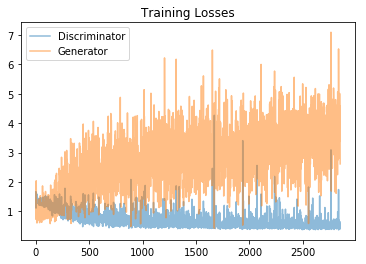

In [22]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [23]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [24]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

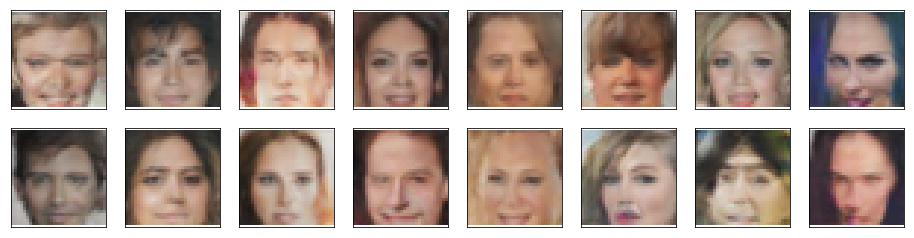

In [25]:
_ = view_samples(-1, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:**

* If the model could learn more about the features of a face such as the skin color, the generated samples would have more varieties of faces.

* Using a larger size of images to train and increasing the convolution layers would help the model to learn complex features to generate better faces.

* For the optimizers and some hyperparameters, I mostly took the default settings from the DCGAN paper. The number of epochs could be increased as long as the discriminator loss is decreasing. However, it would take too much time for me to train the model. I chose to stop at the epoch 50.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.